<a href="https://colab.research.google.com/github/PeterYves/DIC-ML-Assignmnent/blob/main/sprint__neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## MNIST Dataset

---



In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### **`Check the dataset`**

In [3]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

## **`Smoothing`**



In [4]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

### **`Visualization of image data`**

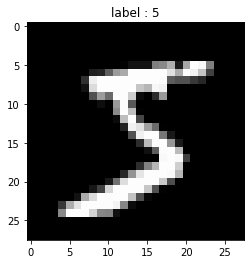

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

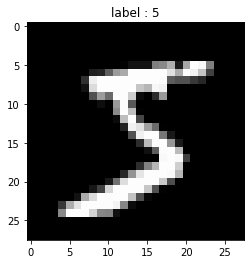

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [6]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float64) ## Convert to float type
image -= 105.35 ## Intentionally try to create a negative decimal value
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) ## Check the value

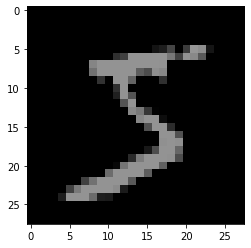

In [7]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

### **`Preprocessing`**

In [8]:
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


## Neural network scratch

---


### **Problem 1-5:** Creating code to determine the initial values of the weights, Implementation of Forward Propagation, Implementation of Cross-Entropy Error, Back-propagation implementation, Estimation

---



In [11]:
from sklearn.preprocessing import OneHotEncoder
class ScratchSimpleNeuralNetrowkClassifier():
    """
    Simple three-layer neural network classifier

    Parameters
    ----------

    Attributes
    ----------
    """
    def __init__(self, n_nodes1, n_nodes2, lr=0.1, epoch=5, batch_size=20, sigma=0.01, activation_func="sigmoid", verbose = True):
        self.verbose = verbose
        self.params = {}
        self.bias = {}
        
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.lr = lr
        self.epoch = epoch
        self.batch_size = batch_size
        self.sigma = sigma
        
        self.train_loss = []
        self.val_loss = []
        
        if activation_func == "sigmoid":
            self.forward_activation_func = self._sigmoid_forward
            self.backward_activation_func = self._sigmoid_backward
        elif activation_func == "tanh":
            self.forward_activation_func = self._tanh_forward
            self.backward_activation_func = self._tanh_backward
        else:
            raise ValueError("No exists such activation function !!")
                
    
    def fit(self, X, y, X_val=None, y_val=None):
        
       ## Whether to record the loss function of verification data
        calc_val = (X_val is not None) & (y_val is not None)
        
        ## One_hot conversion of objective variable
        y = self._one_hot_encoding(y) 
        if calc_val:
            y_val = self._one_hot_encoding(y_val) 
        
        ## Initial value parameter set
        self._set_parameters(X, y)
        
        ## Mini batch object definition
        get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
        
        ## Learning
        for ep in range(self.epoch):
            for mini_X, mini_y in get_mini_batch:
                ## Forward propagation
                ## ① Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                A1 = mini_X @ self.params["W1"] + self.bias["b1"]
                Z1 = self.forward_activation_func(A1)
                ## ② Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                A2 = Z1 @ self.params["W2"] + self.bias["b2"]
                Z2 = self.forward_activation_func(A2)
                ## ③ Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                A3 = Z2 @ self.params["W3"] + self.bias["b3"]
                Z3 = self._softmax(A3)
                #＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                
               ## Backpropagation
                ## ③ Layer＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                deltaA3 = Z3 - mini_y
                deltaB3 = np.sum(deltaA3, axis=0)
                deltaW3 = Z2.T @ deltaA3

                self.params["W3"] -= self.lr * deltaW3
                self.bias["b3"] -= self.lr * deltaB3
                
                deltaZ2 = deltaA3 @ self.params["W3"].T

                ## ② Layer＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                deltaA2 = deltaZ2 * self.backward_activation_func(A2) 
                deltaB2 = np.sum(deltaA2, axis=0)
                deltaW2 = Z1.T @ deltaA2

                self.params["W2"] -= self.lr * deltaW2
                self.bias["b2"] -= self.lr * deltaB2
                
                deltaZ1 = deltaA2 @ self.params["W2"].T
                ## ① Layer＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                deltaA1 = deltaZ1 * self.backward_activation_func(A1) 
                deltaB1 = np.sum(deltaA1, axis=0)
                deltaW1 = mini_X.T @ deltaA1

                self.params["W1"] -= self.lr * deltaW1
                self.bias["b1"] -= self.lr * deltaB1
                #＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

            ## Record of loss
            tr_loss = self._cross_entropy(self.predict_prob(X), y)
            self.train_loss.append(tr_loss)
            
            if self.verbose:
                    print("Train loss of epoch {}: {}".format(ep, tr_loss))
            
            if calc_val:
                va_loss = self._cross_entropy(self.predict_prob(X_val), y_val)
                self.val_loss.append(va_loss)
                
                
    def predict_prob(self, X):
        ## Forward propagation
        ## ① Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
        A1 = X @ self.params["W1"] + self.bias["b1"]
        Z1 = self.forward_activation_func(A1)
        ## ② Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
        A2 = Z1 @ self.params["W2"] + self.bias["b2"]
        Z2 = self.forward_activation_func(A2)
        ## ③ Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
        A3 = Z2 @ self.params["W3"] + self.bias["b3"]
        y = self._softmax(A3)
        ##＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
        
        return y
                
    def predict(self, X):
        y = np.argmax(self.predict_prob(X), axis=1)
         
        return y
    
    def _set_parameters(self, X, y):
        ## Set the number of features and the number of classes
        self.n_features = X.shape[1] 
        self.n_output = y.shape[1]
        
        ## Initial weight
        self.params["W1"] = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.params["W2"] = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.params["W3"] = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        
       ## Bias initial value
        self.bias["b1"] = self.sigma * np.random.randn(self.n_nodes1, )
        self.bias["b2"] = self.sigma * np.random.randn(self.n_nodes2, )
        self.bias["b3"] = self.sigma * np.random.randn(self.n_output, )
    
    def _sigmoid_forward(self, X):
        return 1 / (1 + np.exp(-X))
    
    def _tanh_forward(self, X):
        return np.tanh(X)
    
    def _sigmoid_backward(self, X):
        return (1-self._sigmoid_forward(X)) * self._sigmoid_forward(X)
    
    def _tanh_backward(self, X):
        return (1 - self._tanh_forward(X)**2)
    
    def _softmax(self, X):
        X = X - np.max(X)
        return np.exp(X) / np.sum(np.exp(X), axis=1, keepdims=True)
        
    def _one_hot_encoding(self, y):
        enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
        y_one_hot = enc.fit_transform(y[:, np.newaxis])
        return y_one_hot

    def _cross_entropy(self, X, y):
        batch_size = len(X)
        delta = 1e-7
        return -np.sum(y * np.log(X+delta)) / batch_size

In [12]:
class GetMiniBatch:
    """
    Iterator to get a mini-batch

    Parameters
    ----------
    X :The following form ndarray, shape (n_samples, n_features)
      Training data
    y : The following form ndarray, shape (n_samples, 1)
      Correct answer value
    batch_size : int
      Batch size
    seed : int
      NumPy random number seed
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int64)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
      if self._counter >= self._stop:
          raise StopIteration()
      p0 = self._counter*self.batch_size
      p1 = self._counter*self.batch_size + self.batch_size
      self._counter += 1
      return self._X[p0:p1], self._y[p0:p1]

### **Problem 6 Learning and Estimation**

---



In [13]:
nn = ScratchSimpleNeuralNetrowkClassifier(400,200, epoch=50,lr=1e-3)
nn.fit(X_train, y_train, X_test, y_test)

Train loss of epoch 0: 2.3073592872982536
Train loss of epoch 1: 2.307463188526911
Train loss of epoch 2: 2.305411952837007
Train loss of epoch 3: 2.263152212300946
Train loss of epoch 4: 1.5008779009733195
Train loss of epoch 5: 1.174653288017997
Train loss of epoch 6: 0.8174204805929709
Train loss of epoch 7: 0.70967508544467
Train loss of epoch 8: 0.6332521514177104
Train loss of epoch 9: 0.5648940751081594
Train loss of epoch 10: 0.5159526968798998
Train loss of epoch 11: 0.4797128261369226
Train loss of epoch 12: 0.44668945007420735
Train loss of epoch 13: 0.4132725332661111
Train loss of epoch 14: 0.3847478182787259
Train loss of epoch 15: 0.36395694644930265
Train loss of epoch 16: 0.3479439227832155
Train loss of epoch 17: 0.33439420772729556
Train loss of epoch 18: 0.32227227779275025
Train loss of epoch 19: 0.31113749926871126
Train loss of epoch 20: 0.30076213270250685
Train loss of epoch 21: 0.29097626860391335
Train loss of epoch 22: 0.28163099153122256
Train loss of epoch

In [14]:
y_pred = nn.predict(X_test)
print("pred:", y_pred)
print("ans:", y_test)
print("accuracy score:", accuracy_score(y_test, y_pred))

pred: [7 2 1 ... 4 5 6]
ans: [7 2 1 ... 4 5 6]
accuracy score: 0.9598


### **[Problem 7] Plotting the learning curve**

---



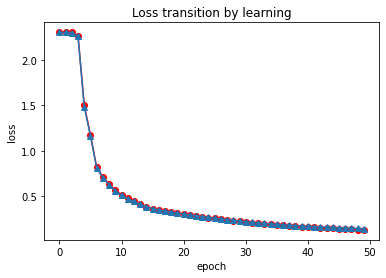

In [24]:
plt.plot(nn.train_loss, marker="o", label="train_loss", c= "red")
plt.plot(nn.val_loss, marker="^", label="val_loss")
plt.title("Loss transition by learning")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [25]:
nn.train_loss

[2.3073592872982536,
 2.307463188526911,
 2.305411952837007,
 2.263152212300946,
 1.5008779009733195,
 1.174653288017997,
 0.8174204805929709,
 0.70967508544467,
 0.6332521514177104,
 0.5648940751081594,
 0.5159526968798998,
 0.4797128261369226,
 0.44668945007420735,
 0.4132725332661111,
 0.3847478182787259,
 0.36395694644930265,
 0.3479439227832155,
 0.33439420772729556,
 0.32227227779275025,
 0.31113749926871126,
 0.30076213270250685,
 0.29097626860391335,
 0.28163099153122256,
 0.2726051383125078,
 0.26381660336233187,
 0.25522511189508507,
 0.24682673323620205,
 0.23864380109751254,
 0.230713109449557,
 0.223074475400432,
 0.2157614637661388,
 0.20879555603316882,
 0.20218417264964011,
 0.19592197886146828,
 0.1899941731022175,
 0.18438028744234036,
 0.1790574235249647,
 0.17400247717440864,
 0.16919341280761524,
 0.16460987603523608,
 0.16023342872949775,
 0.15604758979866143,
 0.15203776979626463,
 0.14819113473567047,
 0.14449641831156806,
 0.14094370423999397,
 0.13752420561767

In [26]:
nn.val_loss

[2.3065495400889,
 2.3064144127446236,
 2.3041228368178635,
 2.2608997478022546,
 1.4827287733984984,
 1.163217727993498,
 0.8098861854227077,
 0.7027393975707981,
 0.6257810340505046,
 0.5568498344819298,
 0.5082160286214853,
 0.47311870391194444,
 0.4416562574634105,
 0.41003067903633894,
 0.3832099250160024,
 0.3637820110753074,
 0.34881016782177066,
 0.3360024084287885,
 0.32435568589835745,
 0.31348390026750905,
 0.3032276174680231,
 0.2934846398218144,
 0.2841588203262821,
 0.27516146714486567,
 0.2664258668650526,
 0.25791649221859037,
 0.24962950047815502,
 0.24158659452911943,
 0.2338249505411346,
 0.2263860251679525,
 0.21930594231954323,
 0.21260924684730967,
 0.20630646894863788,
 0.2003948544893326,
 0.19486105576933094,
 0.18968452720046347,
 0.18484068904169115,
 0.1803033844211272,
 0.1760465509328238,
 0.1720452493284819,
 0.16827624614449663,
 0.1647183096562809,
 0.16135232116652634,
 0.15816126093658997,
 0.1551301055007988,
 0.1522456652241412,
 0.14949639000660125